In [ ]:
#Import package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from datetime import datetime
from time import time

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
url = "https://github.com/Riskyrianda/Data_analyst/blob/main/Database_CSV/dinkes-od_17570_jumlah_kasus_hiv_berdasarkan_kelompok_umur_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,LAKI-LAKI,4,ORANG,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,PEREMPUAN,7,ORANG,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,LAKI-LAKI,3,ORANG,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,PEREMPUAN,0,ORANG,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,15-19,LAKI-LAKI,8,ORANG,2019


# DATA UNDERSTANDING & PREPARATION

In [ ]:
df.shape

(971, 10)

In [ ]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,LAKI-LAKI,4,ORANG,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,PEREMPUAN,7,ORANG,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,LAKI-LAKI,3,ORANG,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,PEREMPUAN,0,ORANG,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,15-19,LAKI-LAKI,8,ORANG,2019


## Kode Provinsi

In [ ]:
df[['kode_provinsi', 'nama_provinsi']].head(10)


,kode_provinsi,nama_provinsi
0,32,JAWA BARAT
1,32,JAWA BARAT
2,32,JAWA BARAT
3,32,JAWA BARAT
4,32,JAWA BARAT
5,32,JAWA BARAT
6,32,JAWA BARAT
7,32,JAWA BARAT
8,32,JAWA BARAT
9,32,JAWA BARAT


In [ ]:
df['kode_provinsi'] = df['kode_provinsi'].replace({32:14})

df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,14,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,LAKI-LAKI,4,ORANG,2019
1,2,14,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,PEREMPUAN,7,ORANG,2019
2,3,14,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,LAKI-LAKI,3,ORANG,2019
3,4,14,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,PEREMPUAN,0,ORANG,2019
4,5,14,JAWA BARAT,3201,KABUPATEN BOGOR,15-19,LAKI-LAKI,8,ORANG,2019


##nama_provinsi

In [ ]:
df['nama_provinsi'] = df['nama_provinsi'].str.replace(r'JAWA BARAT','RIAU', regex=True)
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,14,RIAU,3201,KABUPATEN BOGOR,0-4,LAKI-LAKI,4,ORANG,2019
1,2,14,RIAU,3201,KABUPATEN BOGOR,0-4,PEREMPUAN,7,ORANG,2019
2,3,14,RIAU,3201,KABUPATEN BOGOR,5-14,LAKI-LAKI,3,ORANG,2019
3,4,14,RIAU,3201,KABUPATEN BOGOR,5-14,PEREMPUAN,0,ORANG,2019
4,5,14,RIAU,3201,KABUPATEN BOGOR,15-19,LAKI-LAKI,8,ORANG,2019
5,6,14,RIAU,3201,KABUPATEN BOGOR,15-19,PEREMPUAN,5,ORANG,2019
6,7,14,RIAU,3201,KABUPATEN BOGOR,20-24,LAKI-LAKI,48,ORANG,2019
7,8,14,RIAU,3201,KABUPATEN BOGOR,20-24,PEREMPUAN,21,ORANG,2019
8,9,14,RIAU,3201,KABUPATEN BOGOR,25-49,LAKI-LAKI,217,ORANG,2019
9,10,14,RIAU,3201,KABUPATEN BOGOR,25-49,PEREMPUAN,133,ORANG,2019


##Nama kabupaten_kota

In [ ]:
df['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [ ]:
df.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().sort_values(ascending=False)

nama_kabupaten_kota
KABUPATEN BOGOR            1322
KOTA BOGOR                 1140
KOTA BEKASI                1047
KABUPATEN KARAWANG          814
KABUPATEN SUBANG            808
KOTA CIREBON                785
KOTA CIMAHI                 747
KABUPATEN CIREBON           740
KOTA DEPOK                  666
KABUPATEN BEKASI            595
KABUPATEN BANDUNG           580
KABUPATEN PURWAKARTA        561
KABUPATEN INDRAMAYU         539
KOTA BANDUNG                482
KABUPATEN SUKABUMI          339
KABUPATEN MAJALENGKA        307
KABUPATEN CIANJUR           300
KABUPATEN KUNINGAN          252
KABUPATEN TASIKMALAYA       240
KABUPATEN SUMEDANG          224
KOTA TASIKMALAYA            204
KABUPATEN GARUT             177
KABUPATEN BANDUNG BARAT     170
KABUPATEN CIAMIS            153
KOTA SUKABUMI               141
KOTA BANJAR                  87
KABUPATEN PANGANDARAN        46
Name: jumlah_kasus, dtype: int64

##nama_kabupaten di riau

In [ ]:
replace_dict = {
    r'KABUPATEN BOGOR': 'KOTA PEKANBARU',
    r'KOTA BOGOR': 'KOTA DUMAI',
    r'KOTA BEKASI': 'KABUPATEN BENGKALIS',
    r'KABUPATEN KARAWANG': 'KABUPATEN INDRAGIRI HILIR',
    r'KABUPATEN SUBANG': 'KABUPATEN KAMPAR',
    r'KOTA CIREBON': 'KABUPATEN INDRAGIRI HULU',
    r'KOTA CIMAHI': 'KABUPATEN KEPULAUAN MERANTI',
    r'KABUPATEN CIREBON': 'KABUPATEN KUANTAN SINGINGI',
    r'KOTA DEPOK': 'KABUPATEN PELALAWAN',
    r'KABUPATEN BEKASI': 'KABUPATEN ROKAN HILIR',
    r'KABUPATEN BANDUNG': 'KABUPATEN ROKAN HULU',
    r'KABUPATEN PURWAKARTA': 'KABUPATEN SIAK',

}

df['nama_kabupaten_kota'] = df['nama_kabupaten_kota'].replace(replace_dict, regex=True)

df['nama_kabupaten_kota']

0      KOTA PEKANBARU
1      KOTA PEKANBARU
2      KOTA PEKANBARU
3      KOTA PEKANBARU
4      KOTA PEKANBARU
            ...      
966       KOTA BANJAR
967       KOTA BANJAR
968       KOTA BANJAR
969       KOTA BANJAR
970       KOTA BANJAR
Name: nama_kabupaten_kota, Length: 971, dtype: object

In [ ]:
df.head()


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,14,RIAU,3201,KOTA PEKANBARU,0-4,LAKI-LAKI,4,ORANG,2019
1,2,14,RIAU,3201,KOTA PEKANBARU,0-4,PEREMPUAN,7,ORANG,2019
2,3,14,RIAU,3201,KOTA PEKANBARU,5-14,LAKI-LAKI,3,ORANG,2019
3,4,14,RIAU,3201,KOTA PEKANBARU,5-14,PEREMPUAN,0,ORANG,2019
4,5,14,RIAU,3201,KOTA PEKANBARU,15-19,LAKI-LAKI,8,ORANG,2019


In [ ]:
df['jenis_kelamin'].unique()

array(['LAKI-LAKI', 'PEREMPUAN'], dtype=object)

In [ ]:
df['satuan'].unique()

array(['ORANG'], dtype=object)

## Cek duplikat

In [ ]:
print(f" {df.duplicated().sum()} baris data duplikat ditemukan")

 0 baris data duplikat ditemukan


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
kelompok_umur          0
jenis_kelamin          0
jumlah_kasus           0
satuan                 0
tahun                  0
dtype: int64


In [ ]:
df['nama_kabupaten_kota'].unique()

array(['KOTA PEKANBARU', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN ROKAN HULU', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN',
       'KABUPATEN KUANTAN SINGINGI', 'KABUPATEN MAJALENGKA',
       'KABUPATEN SUMEDANG', 'KABUPATEN INDRAMAYU', 'KABUPATEN KAMPAR',
       'KABUPATEN SIAK', 'KABUPATEN INDRAGIRI HILIR',
       'KABUPATEN ROKAN HILIR', 'KABUPATEN ROKAN HULU BARAT',
       'KABUPATEN PANGANDARAN', 'KOTA DUMAI', 'KOTA SUKABUMI',
       'KOTA BANDUNG', 'KABUPATEN INDRAGIRI HULU', 'KABUPATEN BENGKALIS',
       'KABUPATEN PELALAWAN', 'KABUPATEN KEPULAUAN MERANTI',
       'KOTA TASIKMALAYA', 'KOTA BANJAR'], dtype=object)

##Hapus kabupaten sisa

In [ ]:
replacements = {
    'KABUPATEN SUKABUMI': np.nan,
    'KABUPATEN CIANJUR': np.nan,
    'KABUPATEN GARUT': np.nan,
    'KABUPATEN TASIKMALAYA': np.nan,
    'KABUPATEN MAJALENGKA': np.nan,
    'KABUPATEN CIAMIS': np.nan,
    'KABUPATEN INDRAMAYU': np.nan,
    'KOTA SUKABUMI': np.nan,
    'KOTA BANDUNG': np.nan,
    'KOTA TASIKMALAYA':np.nan,
    'KOTA BANJAR': np.nan,
    'KABUPATEN SUMEDANG':np.nan,
    'KABUPATEN PANGANDARAN' :np.nan,
    'KABUPATEN KUNINGAN':np.nan

}

df['nama_kabupaten_kota'] = df['nama_kabupaten_kota'].replace(replacements)


In [ ]:
df.dropna(subset=['nama_kabupaten_kota'], inplace=True)

In [ ]:
df['nama_kabupaten_kota'].unique()

array(['KOTA PEKANBARU', 'KABUPATEN ROKAN HULU',
       'KABUPATEN KUANTAN SINGINGI', 'KABUPATEN KAMPAR', 'KABUPATEN SIAK',
       'KABUPATEN INDRAGIRI HILIR', 'KABUPATEN ROKAN HILIR',
       'KABUPATEN ROKAN HULU BARAT', 'KOTA DUMAI',
       'KABUPATEN INDRAGIRI HULU', 'KABUPATEN BENGKALIS',
       'KABUPATEN PELALAWAN', 'KABUPATEN KEPULAUAN MERANTI'], dtype=object)

## Kecualikan kabupaten rokan hulu barat

In [ ]:
df = df[df['nama_kabupaten_kota'] != 'KABUPATEN ROKAN HULU BARAT']

In [ ]:
df['nama_kabupaten_kota'].unique()

array(['KOTA PEKANBARU', 'KABUPATEN ROKAN HULU',
       'KABUPATEN KUANTAN SINGINGI', 'KABUPATEN KAMPAR', 'KABUPATEN SIAK',
       'KABUPATEN INDRAGIRI HILIR', 'KABUPATEN ROKAN HILIR', 'KOTA DUMAI',
       'KABUPATEN INDRAGIRI HULU', 'KABUPATEN BENGKALIS',
       'KABUPATEN PELALAWAN', 'KABUPATEN KEPULAUAN MERANTI'], dtype=object)

In [ ]:
df[df['nama_kabupaten_kota'] == 'KABUPATEN SIAK']

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
156,157,14,RIAU,3214,KABUPATEN SIAK,0-4,LAKI-LAKI,3,ORANG,2019
157,158,14,RIAU,3214,KABUPATEN SIAK,0-4,PEREMPUAN,2,ORANG,2019
158,159,14,RIAU,3214,KABUPATEN SIAK,5-14,LAKI-LAKI,0,ORANG,2019
159,160,14,RIAU,3214,KABUPATEN SIAK,5-14,PEREMPUAN,0,ORANG,2019
160,161,14,RIAU,3214,KABUPATEN SIAK,15-19,LAKI-LAKI,2,ORANG,2019
161,162,14,RIAU,3214,KABUPATEN SIAK,15-19,PEREMPUAN,1,ORANG,2019
162,163,14,RIAU,3214,KABUPATEN SIAK,20-24,LAKI-LAKI,24,ORANG,2019
163,164,14,RIAU,3214,KABUPATEN SIAK,20-24,PEREMPUAN,9,ORANG,2019
164,165,14,RIAU,3214,KABUPATEN SIAK,25-49,LAKI-LAKI,105,ORANG,2019
165,166,14,RIAU,3214,KABUPATEN SIAK,25-49,PEREMPUAN,34,ORANG,2019


## Kode Kabupaten

In [ ]:
# Sesuaikan kode kabupaten masing - masinf daerah

df['kode_kabupaten_kota'] = df['kode_kabupaten_kota'].replace({3201 : '28111-28299', 3271: '28811-28882', 3275 : '28711-28786', 3215: '29211-29282' , 3213 :'28411 - 28475' , 3274:'29311-29371' , 3277: '28750-28758' , 3209: '29511-29569' , 3276:'28352-28388' , 3216: '28911-28995' , 3204 : '28550-28565' , 3214: '28654-28773' })

In [ ]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,LAKI-LAKI,4,ORANG,2019
1,2,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,PEREMPUAN,7,ORANG,2019
2,3,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,LAKI-LAKI,3,ORANG,2019
3,4,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,PEREMPUAN,0,ORANG,2019
4,5,14,RIAU,28111-28299,KOTA PEKANBARU,15-19,LAKI-LAKI,8,ORANG,2019


#Check Outlier

## Jumlah_Kasus

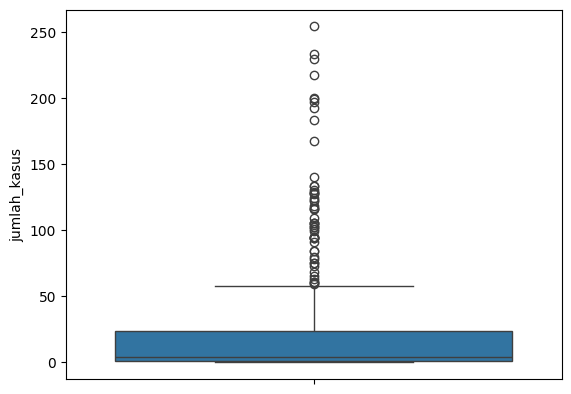

<Figure size 1000x2000 with 0 Axes>

In [ ]:
sns.boxplot(df['jumlah_kasus'])
plt.figure(figsize =(10,20))
plt.show()

In [ ]:
df['jumlah_kasus'].max()

254

In [ ]:
df['jumlah_kasus'].min()

0

In [ ]:
df[(df['nama_kabupaten_kota'] == 'KOTA PEKANBARU') & (df['jumlah_kasus'])]

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
1,2,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,PEREMPUAN,7,ORANG,2019
2,3,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,LAKI-LAKI,3,ORANG,2019
5,6,14,RIAU,28111-28299,KOTA PEKANBARU,15-19,PEREMPUAN,5,ORANG,2019
7,8,14,RIAU,28111-28299,KOTA PEKANBARU,20-24,PEREMPUAN,21,ORANG,2019
8,9,14,RIAU,28111-28299,KOTA PEKANBARU,25-49,LAKI-LAKI,217,ORANG,2019
9,10,14,RIAU,28111-28299,KOTA PEKANBARU,25-49,PEREMPUAN,133,ORANG,2019
11,12,14,RIAU,28111-28299,KOTA PEKANBARU,≥50,PEREMPUAN,13,ORANG,2019
324,325,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,LAKI-LAKI,7,ORANG,2020
325,326,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,PEREMPUAN,1,ORANG,2020
327,328,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,PEREMPUAN,1,ORANG,2020


In [ ]:
df[(df['nama_kabupaten_kota'] == 'KOTA PEKANBARU') & (df['jumlah_kasus'])].max()

id                                658
kode_provinsi                      14
nama_provinsi                    RIAU
kode_kabupaten_kota       28111-28299
nama_kabupaten_kota    KOTA PEKANBARU
kelompok_umur                     ≥50
jenis_kelamin               PEREMPUAN
jumlah_kasus                      229
satuan                          ORANG
tahun                            2021
dtype: object

# INITIAL EDA

## jenis kelamin

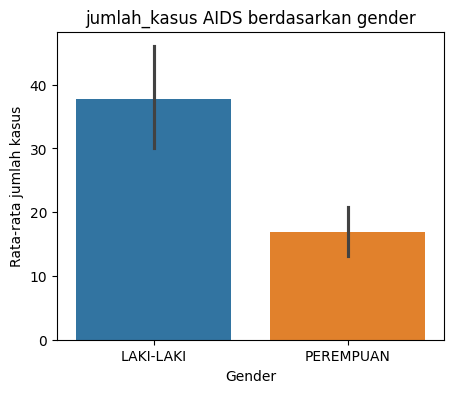

In [ ]:
filter = df[df['jumlah_kasus'] > 0]

plt.figure(figsize=(5, 4))
sns.barplot(x='jenis_kelamin', y='jumlah_kasus', hue='jenis_kelamin', data=filter)

plt.xlabel('Gender')
plt.ylabel('Rata-rata jumlah kasus')
plt.title('jumlah_kasus AIDS berdasarkan gender')

plt.show()


In [ ]:
# drop kolom id karena tidak digunakan

df.drop(columns=['id'],inplace=True)

In [ ]:
df.head()

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,LAKI-LAKI,4,ORANG,2019
1,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,PEREMPUAN,7,ORANG,2019
2,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,LAKI-LAKI,3,ORANG,2019
3,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,PEREMPUAN,0,ORANG,2019
4,14,RIAU,28111-28299,KOTA PEKANBARU,15-19,LAKI-LAKI,8,ORANG,2019


# CLUSTERING

## modeling

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2214.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1957.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1806.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1730.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mov

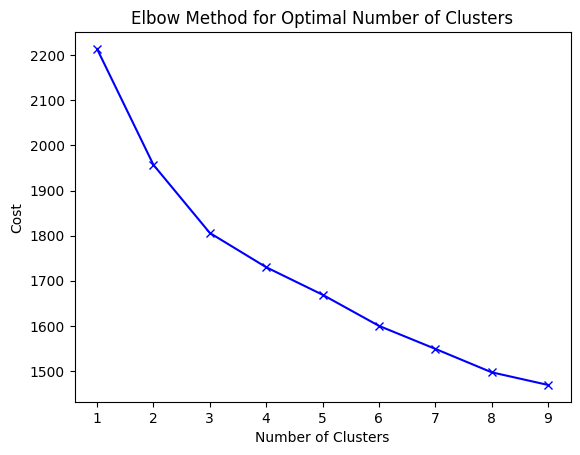

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1806.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1806.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1806.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1806.0
Best run was number 1
        kode_provinsi                                          jumlah_kasus  \
                count  mean  std   min   25%   50%   75%   max        count   
Cluster                                                                       
0               224.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0        224.0   
1               116.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0        116.0   
2                92.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0         

In [ ]:

# Mengurutkan DataFrame berdasarkan kolom jumlah_kasus tertinggi
df_sorted = df.sort_values(by='jumlah_kasus', ascending=False)

# Menentukan jumlah klaster yang optimal dengan metode Elbow
cost = []
K = range(1, 10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init='Cao', n_init=4, verbose=1)
    kmode.fit_predict(df_sorted)
    cost.append(kmode.cost_)

# Melakukan visualisasi num_cluster
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Saya memutuskan untuk membagi cluster menjadi 3 cluster
kmode = KModes(n_clusters=3, init='cao', n_init=4, verbose=1, random_state=42)
clusters = kmode.fit_predict(df_sorted)

# Membuat kolom baru pada DataFrame yang berisi nilai Cluster
df_sorted['Cluster'] = clusters

# Mengurutkan DataFrame berdasarkan klaster dan jumlah kasus untuk memudahkan analisis
df_sorted = df_sorted.sort_values(by=['Cluster', 'jumlah_kasus'], ascending=[True, False])

# Mengecek deskripsi data cluster
cluster_summary = df_sorted.groupby('Cluster').describe()
print(cluster_summary)


In [ ]:
#membuat kolom baru pada customer yang berisi nilai Cluster

df['Cluster'] = clusters
df.head()

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun,Cluster
0,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,LAKI-LAKI,4,ORANG,2019,0
1,14,RIAU,28111-28299,KOTA PEKANBARU,0-4,PEREMPUAN,7,ORANG,2019,1
2,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,LAKI-LAKI,3,ORANG,2019,1
3,14,RIAU,28111-28299,KOTA PEKANBARU,5-14,PEREMPUAN,0,ORANG,2019,0
4,14,RIAU,28111-28299,KOTA PEKANBARU,15-19,LAKI-LAKI,8,ORANG,2019,2


In [ ]:
#mengecek deskripsi data cluster

cluster_summary = df.groupby('Cluster').describe()
cluster_summary

kode_provinsi                                          jumlah_kasus  \
                count  mean  std   min   25%   50%   75%   max        count   
Cluster                                                                       
0               224.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0        224.0   
1               116.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0        116.0   
2                92.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0         92.0   

                    ...                tahun                                 \
              mean  ...    75%    max  count         mean       std     min   
Cluster             ...                                                       
0        24.558036  ...  21.00  217.0  224.0  2020.066964  0.820138  2019.0   
1        19.431034  ...  23.75  254.0  116.0  2020.060345  0.857588  2019.0   
2        22.282609  ...  26.75  233.0   92.0  2019.760870  0.716671  2019.0   

                                         
            25%     50%     75%     max  
Cluster                                  
0        2019.0  2020.0  2021.0  2021.0  
1        2019.0  2020.0  2021.0  2021.0  
2        2019.0  2020.0  2020.0  2021.0  

[3 rows x 24 columns]

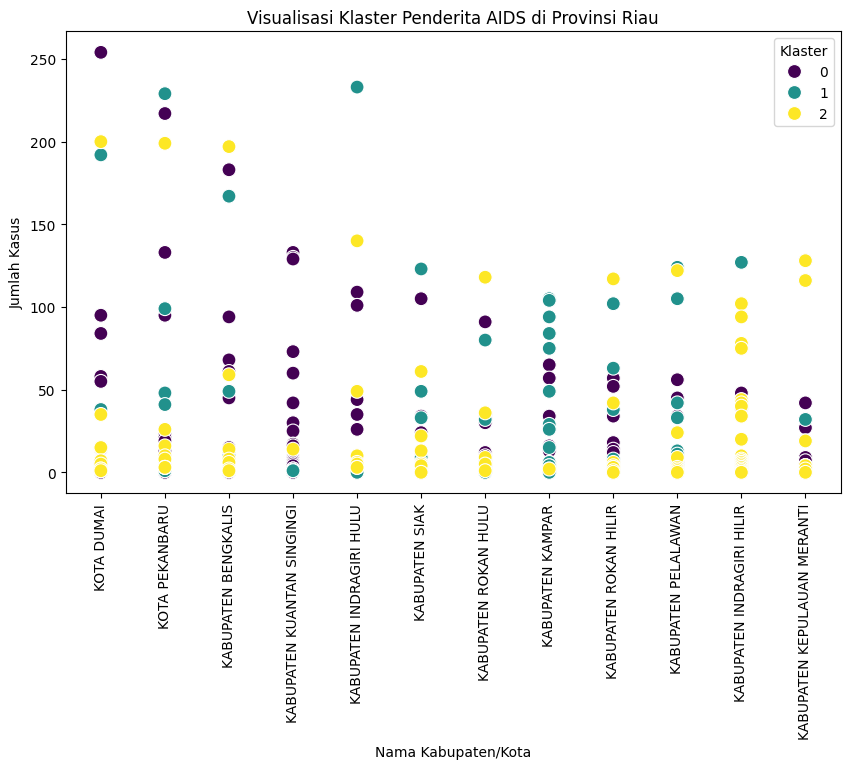

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot untuk visualisasi klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted, x='nama_kabupaten_kota', y='jumlah_kasus', hue='Cluster', palette='viridis', s=100)
plt.xticks(rotation=90)
plt.title('Visualisasi Klaster Penderita AIDS di Provinsi Riau')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Klaster')
plt.show()


In [ ]:
# #simpan ke file baru
# from google.colab import drive

# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/gemastik3.csv'
# df.to_csv(file_path, index=False)